In [1]:
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve,precision_score,recall_score

In [2]:
data=pd.read_csv("agaricus-lepiota.data",names=['poison','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color',' ring-number','ring-type','spore-print-color','population','habitat'])

In [3]:
data

,poison,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poison                    8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
data.isnull().sum()

poison                      0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
 ring-number                0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
for column in data.columns:
    xx=data[column].value_counts()
    print(xx.index)

Index(['e', 'p'], dtype='object')
Index(['x', 'f', 'k', 'b', 's', 'c'], dtype='object')
Index(['y', 's', 'f', 'g'], dtype='object')
Index(['n', 'g', 'e', 'y', 'w', 'b', 'p', 'c', 'u', 'r'], dtype='object')
Index(['f', 't'], dtype='object')
Index(['n', 'f', 'y', 's', 'a', 'l', 'p', 'c', 'm'], dtype='object')
Index(['f', 'a'], dtype='object')
Index(['c', 'w'], dtype='object')
Index(['b', 'n'], dtype='object')
Index(['b', 'p', 'w', 'n', 'g', 'h', 'u', 'k', 'e', 'y', 'o', 'r'], dtype='object')
Index(['t', 'e'], dtype='object')
Index(['b', '?', 'e', 'c', 'r'], dtype='object')
Index(['s', 'k', 'f', 'y'], dtype='object')
Index(['s', 'k', 'f', 'y'], dtype='object')
Index(['w', 'p', 'g', 'n', 'b', 'o', 'e', 'c', 'y'], dtype='object')
Index(['w', 'p', 'g', 'n', 'b', 'o', 'e', 'c', 'y'], dtype='object')
Index(['p'], dtype='object')
Index(['w', 'n', 'o', 'y'], dtype='object')
Index(['o', 't', 'n'], dtype='object')
Index(['p', 'e', 'l', 'f', 'n'], dtype='object')
Index(['w', 'n', 'k', 'h', 'r', 'u'

In [7]:
data.drop(["cap-color","veil-type","stalk-root","stalk-shape"],axis=1,inplace=True)

In [8]:
data

,poison,cap-shape,cap-surface,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,t,p,f,c,n,k,s,s,w,w,w,o,p,k,s,u
1,e,x,s,t,a,f,c,b,k,s,s,w,w,w,o,p,n,n,g
2,e,b,s,t,l,f,c,b,n,s,s,w,w,w,o,p,n,n,m
3,p,x,y,t,p,f,c,n,n,s,s,w,w,w,o,p,k,s,u
4,e,x,s,f,n,f,w,b,k,s,s,w,w,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,f,n,a,c,b,y,s,s,o,o,o,o,p,b,c,l
8120,e,x,s,f,n,a,c,b,y,s,s,o,o,n,o,p,b,v,l
8121,e,f,s,f,n,a,c,b,n,s,s,o,o,o,o,p,b,c,l
8122,p,k,y,f,y,f,c,n,b,s,k,w,w,w,o,e,w,v,l


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poison                    8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-surface-above-ring  8124 non-null   object
 10  stalk-surface-below-ring  8124 non-null   object
 11  stalk-color-above-ring    8124 non-null   object
 12  stalk-color-below-ring    8124 non-null   object
 13  veil-color                8124 non-null   object
 14   ring-number            

In [10]:
data.describe()

,poison,cap-shape,cap-surface,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,2,9,2,2,2,12,4,4,9,9,4,3,5,9,6,7
top,e,x,y,f,n,f,c,b,b,s,s,w,w,w,o,p,w,v,d
freq,4208,3656,3244,4748,3528,7914,6812,5612,1728,5176,4936,4464,4384,7924,7488,3968,2388,4040,3148


In [11]:
data.dtypes

poison                      object
cap-shape                   object
cap-surface                 object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-color                  object
 ring-number                object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [12]:
le=LabelEncoder()
for column in data.columns:
    data[column]=le.fit_transform(data[column])

In [13]:
data.head()

,poison,cap-shape,cap-surface,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,1,6,1,0,1,4,2,2,7,7,2,1,4,2,3,5
1,0,5,2,1,0,1,0,0,4,2,2,7,7,2,1,4,3,2,1
2,0,0,2,1,3,1,0,0,5,2,2,7,7,2,1,4,3,2,3
3,1,5,3,1,6,1,0,1,5,2,2,7,7,2,1,4,2,3,5
4,0,5,2,0,5,1,1,0,4,2,2,7,7,2,1,0,3,0,1


In [14]:
x=data.iloc[:,1:].values
y=data.iloc[:,0].values

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [88]:
cl1=SVC(kernel="rbf",random_state=0,probability=True)
cl1.fit(x_train,y_train)

SVC(probability=True, random_state=0)

In [89]:
cl1.score(x_train,y_train)

0.9832281889521465

In [90]:
ypred1=cl1.predict(x_test)

In [91]:
acc1=accuracy_score(y_test,ypred1)

In [92]:
acc1

0.9833846153846154

In [93]:
print("pscore",precision_score(y_test,ypred1))

pscore 0.9934640522875817


In [94]:
print("rscore",recall_score(y_test,ypred1))

rscore 0.9718670076726342


In [95]:
cm1=confusion_matrix(y_test,ypred1)

In [96]:
cm1

array([[838,   5],
       [ 22, 760]], dtype=int64)

<Axes: >

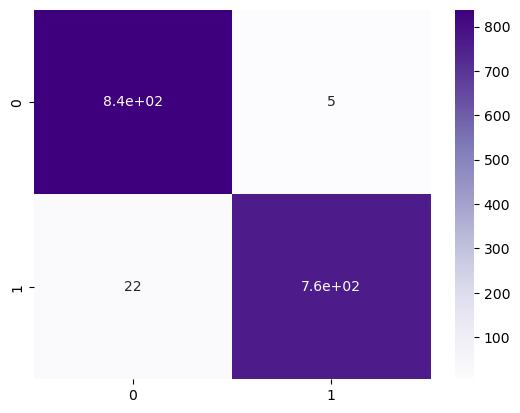

In [103]:
sns.heatmap(cm1,cmap='Purples',annot=True)

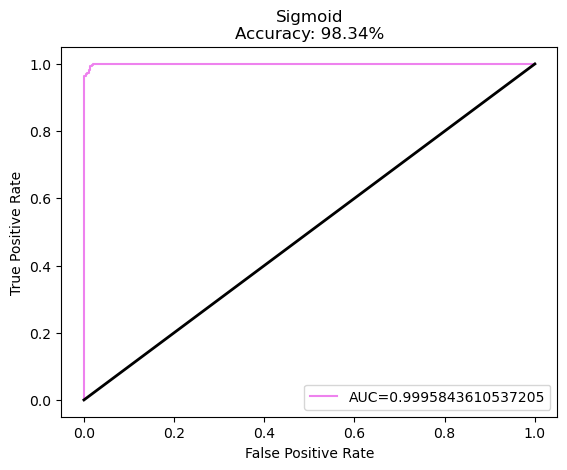

In [109]:
import matplotlib.pyplot as plt
from sklearn import metrics
y_pred_proba = cl1.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc),color='violet')
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], color='black', lw=2)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Sigmoid\nAccuracy: {:.2f}%'.format(acc1 * 100))
plt.show()

In [55]:
cl2=SVC(kernel="linear",random_state=0,probability=True)
cl2.fit(x_train,y_train)

SVC(kernel='linear', probability=True, random_state=0)

In [56]:
cl2.score(x_train,y_train)

0.9524542237267272

In [57]:
ypred2=cl2.predict(x_test)

In [58]:
acc2=accuracy_score(y_test,ypred2)
acc2

0.9489230769230769

In [59]:
print("pscore",precision_score(y_test,ypred2))

pscore 0.9475032010243278


In [60]:
print("pscore",precision_score(y_test,ypred2))

pscore 0.9475032010243278


In [61]:
cm2=confusion_matrix(y_test,ypred2)
cm2

array([[802,  41],
       [ 42, 740]], dtype=int64)

<Axes: >

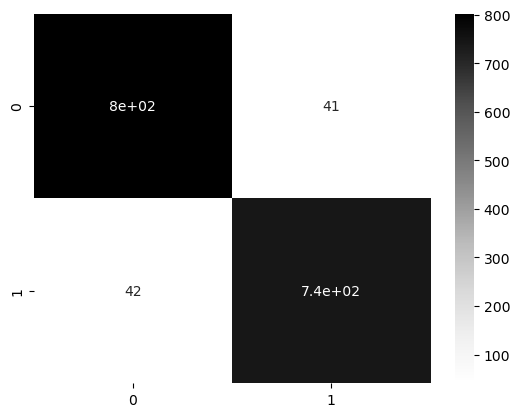

In [101]:
sns.heatmap(cm2,cmap='Greys',annot=True)

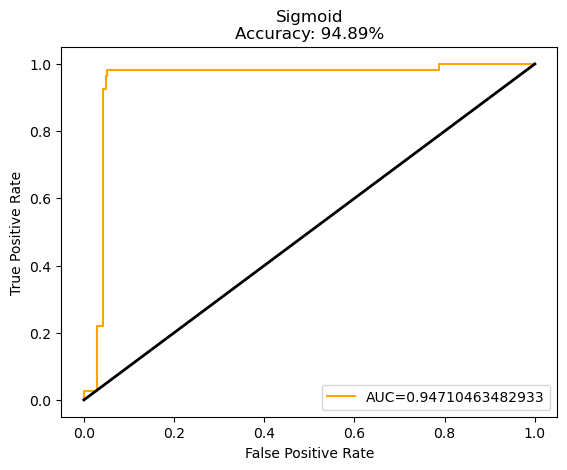

In [108]:
import matplotlib.pyplot as plt
from sklearn import metrics
y_pred_proba = cl2.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc),color='orange')
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], color='black', lw=2)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Sigmoid\nAccuracy: {:.2f}%'.format(acc2* 100))
plt.show()

In [63]:
cl3=SVC(kernel="poly",random_state=0,probability=True)
cl3.fit(x_train,y_train)

SVC(kernel='poly', probability=True, random_state=0)

In [64]:
cl3.score(x_train,y_train)

0.9956916448684413

In [65]:
ypred3=cl3.predict(x_test)

In [66]:
acc3=accuracy_score(y_test,ypred3)
acc3

0.9969230769230769

In [67]:
print("pscore",precision_score(y_test,ypred3))

pscore 0.9949044585987261


In [68]:
print("rscore",precision_score(y_test,ypred3))

rscore 0.9949044585987261


In [69]:
cm3=confusion_matrix(y_test,ypred3)
cm3

array([[839,   4],
       [  1, 781]], dtype=int64)

<Axes: >

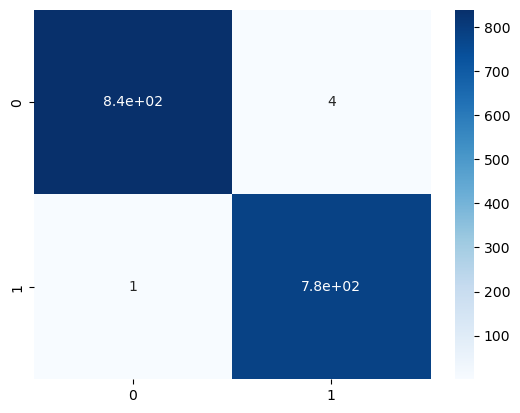

In [99]:
sns.heatmap(cm3,cmap='Blues',annot=True)

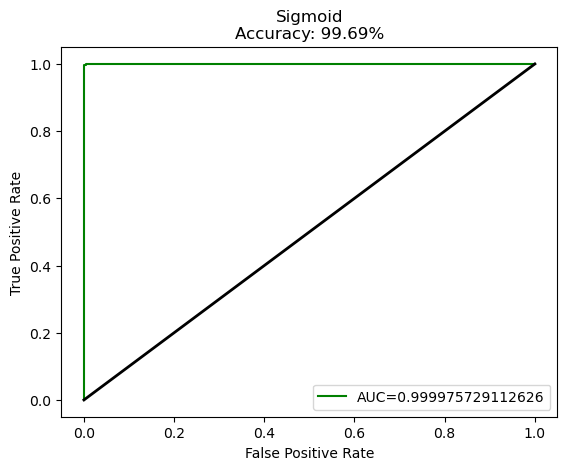

In [106]:
import matplotlib.pyplot as plt
from sklearn import metrics
y_pred_proba = cl3.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc),color='green')
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], color='black', lw=2)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Sigmoid\nAccuracy: {:.2f}%'.format(acc3 * 100))
plt.show()

In [71]:
cl4=SVC(kernel="sigmoid",random_state=0,probability=True)
cl4.fit(x_train,y_train)

SVC(kernel='sigmoid', probability=True, random_state=0)

In [72]:
cl4.score(x_train,y_train)

0.4756116325588552

In [73]:
ypred4=cl4.predict(x_test)

In [74]:
acc4=accuracy_score(y_test,ypred4)
acc4

0.47015384615384614

In [75]:
print("pscore",precision_score(y_test,ypred4))

pscore 0.4496815286624204


In [76]:
print("rscore",precision_score(y_test,ypred4))

rscore 0.4496815286624204


In [79]:
cm4=confusion_matrix(y_test,ypred4)
cm4

array([[411, 432],
       [429, 353]], dtype=int64)

<Axes: >

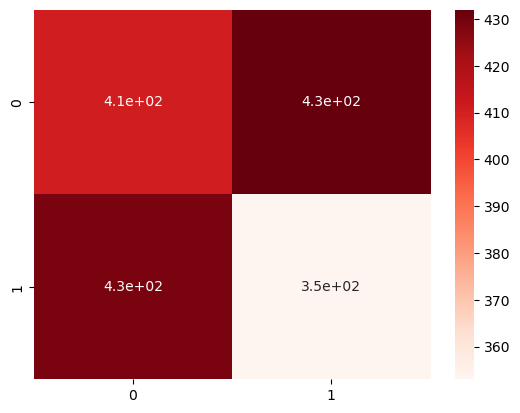

In [80]:
sns.heatmap(cm4,cmap='Reds',annot=True)

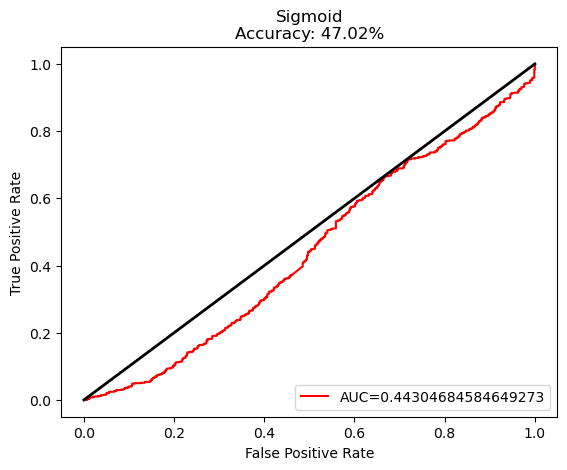

In [105]:
import matplotlib.pyplot as plt
from sklearn import metrics
y_pred_proba = cl4.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc),color='red')
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], color='black', lw=2)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Sigmoid\nAccuracy: {:.2f}%'.format(acc4 * 100))
plt.show()